# Autoencoderサンプル(Pytorch)
作成日2021/05/07


In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
import dataset
Dataset = dataset.dataset("Obrid_AE", "data")
Dataset.concat_data("sample_data")
Dataset = dataset.dataset("Obrid_AE", "test")
print("----------------------")
Dataset.concat_data("sample_test")
print("----------------------")
data = Dataset.read_savedata("sample_test")
print(data.shape[0])
print("----------------------")
data, test_data , anomaly_data= Dataset.read_traindata("sample_data", "sample_test", 300, 300, 1)


(503, 256)
(503, 256)
----------------------
(99, 256)
(99, 256)
----------------------
(99, 256)
99
----------------------
(503, 256)
(99, 256)
1148 0
rate 0.9
data.shape[0]: 503
rate 452
TrainData (300, 300, 1, 1, 256)
TestData (51, 256)
ÄnomalyDta (99, 256)


##  一次元CNN
カーネルのサイズとか色々変えながらやってみてください。
前結合層も組み込もうとしてたけど、あまり具合が良くなさそうだったためコメントアウトしてます。
丸め誤差的なので出力サイズが256にならない現象が起きてるので、output_paddingなど追加した、ここら辺のパラメタを使えば埋め合わせができる

## 学習

In [3]:
import mainmodel
import numpy as np
model = mainmodel.Autoencoder2()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-3, weight_decay = 1e-5)

outputs = []
#テンソル型に変換
data = torch.from_numpy(data.astype(np.float32)).clone()
for epoch in data:
    for data in epoch:
        recon = model(data)
        print(recon.shape, data.shape)
        loss = criterion(recon, data)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print('Epoch:{}, Loss:{:.4f}'.format(epoch+1, float(loss)))
    outputs.append((epoch, data, recon))

([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
torch.Size([1, 1, 256]) torch.Size([1, 1, 256])
to

## 学習過程

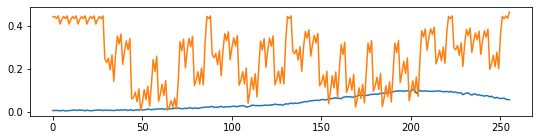

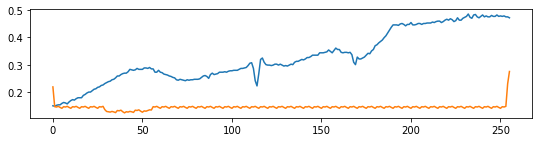

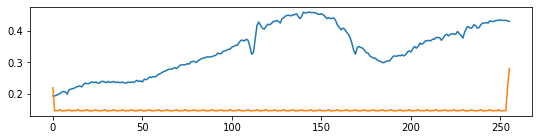

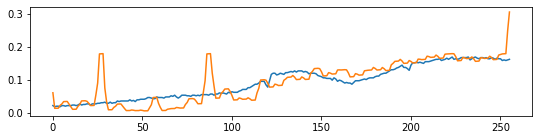

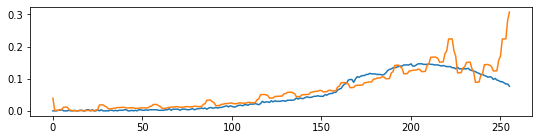

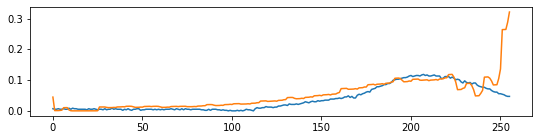

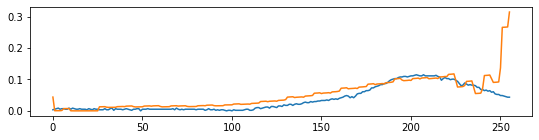

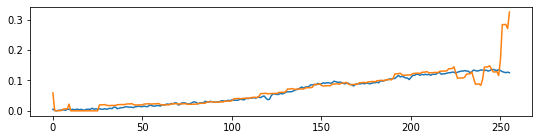

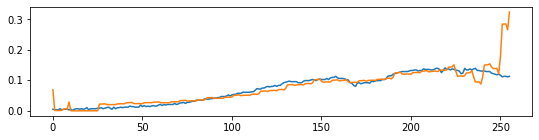

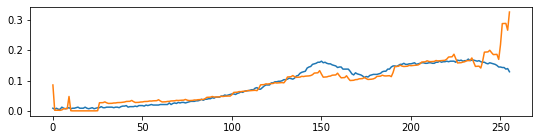

In [4]:
import numpy as np
model_name = "3"
ModelEdit = mainmodel.Modeledit("Obrid_AE")
ModelEdit.save_model(model, model_name) 
epoch_num = 100
for k in range(0, epoch_num, int(epoch_num/10)):
    plt.figure(figsize=(9, 2))
    datas = outputs[k][1].flatten().detach().numpy()
    recon = outputs[k][2].flatten().detach().numpy()
    # print(data.flatten())
    # print(recon.flatten())
    plt.plot(datas)
    plt.plot(recon)

## 異常検知

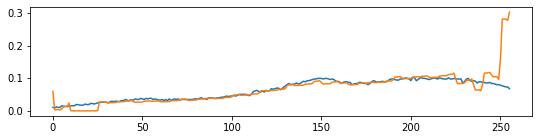

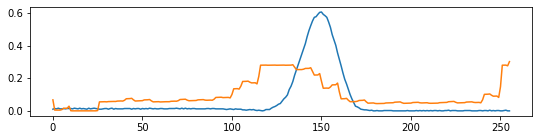

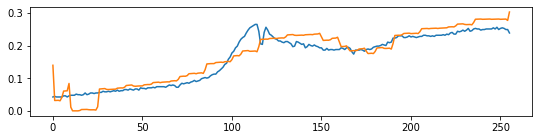

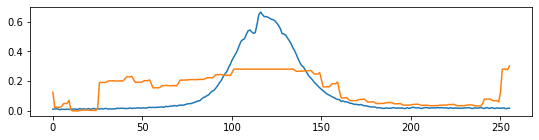

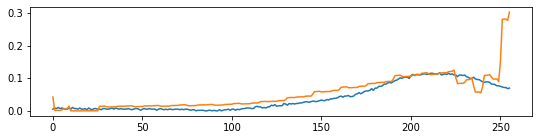

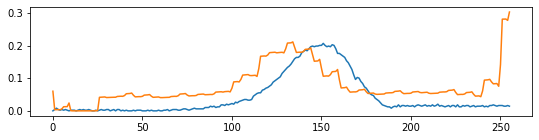

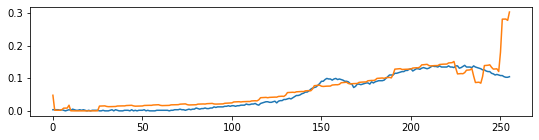

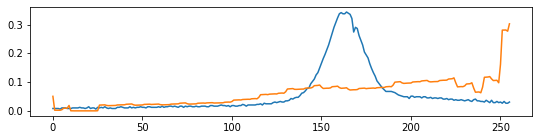

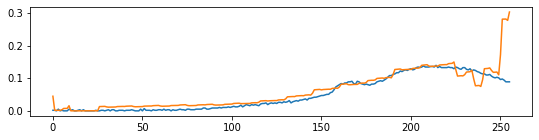

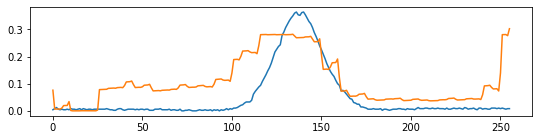

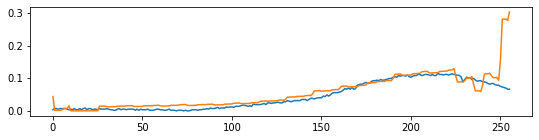

IndexError: index 60 is out of bounds for axis 0 with size 51

In [5]:
num = 5
for i in range(anomaly_data.shape[0]):
    if i % 10 == 0:
        data0 =  torch.from_numpy((test_data[i]).astype(np.float32)).clone()
        test0 =  torch.from_numpy((anomaly_data[i]).astype(np.float32)).clone()

        plt.figure(figsize=(9, 2))
        # data = data0.numpy()
        data = data0[np.newaxis, np.newaxis, :]
        recon = model(data).detach().numpy()
        plt.plot(data0.numpy())
        plt.plot(recon.flatten())
        plt.show()

        plt.figure(figsize=(9, 2))
        # data = test0.numpy()
        data = test0[np.newaxis, np.newaxis, :]
        recon = model(data).detach().numpy()
        plt.plot(test0.numpy())
        plt.plot(recon.flatten())

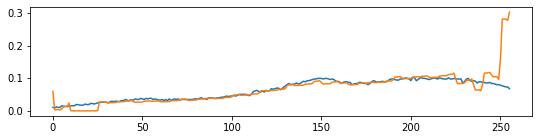

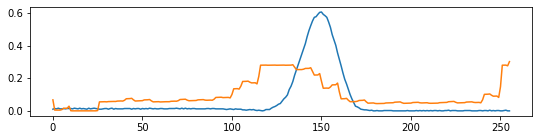

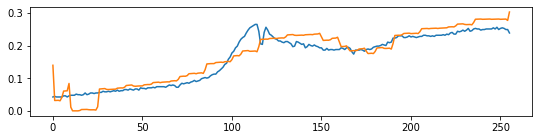

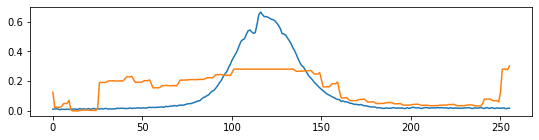

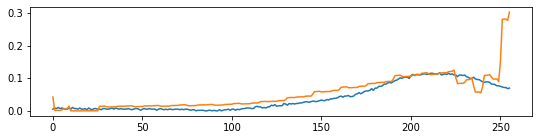

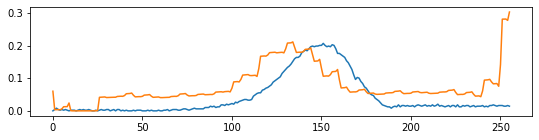

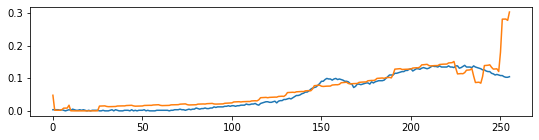

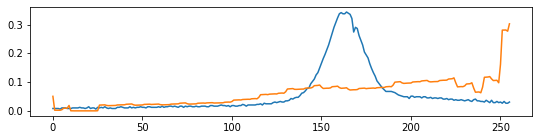

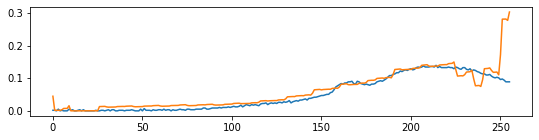

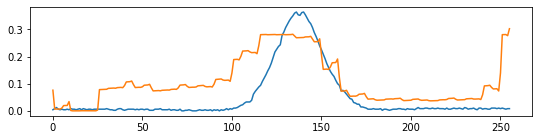

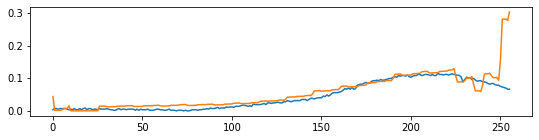

IndexError: index 60 is out of bounds for axis 0 with size 51

In [8]:
num = 3
input_model = mainmodel.Autoencoder2()
Dataset.savenumpy(data, test_data, anomaly_data, num)

new_model = mainmodel.Modeledit("Obrid_AE").read_model(input_model,"Obrid_AE/model_data/20210515/2.pth")
for i in range(anomaly_data.shape[0]):
    if i % 10 == 0:
        data0 =  torch.from_numpy((test_data[i]).astype(np.float32)).clone()
        test0 =  torch.from_numpy((anomaly_data[i]).astype(np.float32)).clone()

        plt.figure(figsize=(9, 2))
        # data = data0.numpy()
        data = data0[np.newaxis, np.newaxis, :]
        recon = model(data).detach().numpy()
        plt.plot(data0.numpy())
        plt.plot(recon.flatten())
        plt.show()

        plt.figure(figsize=(9, 2))
        # data = test0.numpy()
        data = test0[np.newaxis, np.newaxis, :]
        recon = model(data).detach().numpy()
        plt.plot(test0.numpy())
        plt.plot(recon.flatten())